<a href="https://colab.research.google.com/github/zooodung/TA-Prediction/blob/woogie/daegu_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
cd "/content/drive/MyDrive/open"

/content/drive/MyDrive/open


In [40]:
!git clone https://github.com/zooodung/TA-Prediction.git

Cloning into 'TA-Prediction'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [14]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from datetime import datetime
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [15]:
train = pd.read_csv('/content/drive/MyDrive/open/open/train.csv')
test = pd.read_csv('/content/drive/MyDrive/open/open/test.csv')
countrywide_accident = pd.read_csv('/content/drive/MyDrive/open/open/external_open/countrywide_accident.csv', encoding='utf-8')

In [18]:
display(train.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [17]:
display(test.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


In [5]:
train = pd.concat([countrywide_accident,train],axis=0)
train = train.reset_index(drop=True)

In [6]:
sample_submission = pd.read_csv('/content/drive/MyDrive/open/open/sample_submission.csv')
sample_submission.head()

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613738 entries, 0 to 613737
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           613738 non-null  object 
 1   사고일시         613738 non-null  object 
 2   요일           613738 non-null  object 
 3   기상상태         613738 non-null  object 
 4   시군구          613738 non-null  object 
 5   도로형태         613738 non-null  object 
 6   노면상태         613737 non-null  object 
 7   사고유형         613738 non-null  object 
 8   사고유형 - 세부분류  602775 non-null  object 
 9   법규위반         602775 non-null  object 
 10  가해운전자 차종     602775 non-null  object 
 11  가해운전자 성별     602775 non-null  object 
 12  가해운전자 연령     602775 non-null  object 
 13  가해운전자 상해정도   602775 non-null  object 
 14  피해운전자 차종     576948 non-null  object 
 15  피해운전자 성별     576946 non-null  object 
 16  피해운전자 연령     576949 non-null  object 
 17  피해운전자 상해정도   576946 non-null  object 
 18  사망자수         602775 non-

In [15]:
train.describe().round(2)

,사망자수,중상자수,경상자수,부상자수,ECLO
count,602775.00,602775.00,602775.00,602775.00,602775.00
mean,0.01,0.30,1.08,0.09,4.95
std,0.13,0.55,1.05,0.37,3.62
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,3.00
50%,0.00,0.00,1.00,0.00,3.00
75%,0.00,1.00,1.00,0.00,6.00
max,7.00,31.00,41.00,47.00,245.00


In [8]:
from warnings import WarningMessage
print(train.isnull().sum())

ID                 0
사고일시               0
요일                 0
기상상태               0
시군구                0
도로형태               0
노면상태               1
사고유형               0
사고유형 - 세부분류    10963
법규위반           10963
가해운전자 차종       10963
가해운전자 성별       10963
가해운전자 연령       10963
가해운전자 상해정도     10963
피해운전자 차종       36790
피해운전자 성별       36792
피해운전자 연령       36789
피해운전자 상해정도     36792
사망자수           10963
중상자수           10963
경상자수           10963
부상자수           10963
ECLO           10963
dtype: int64


<Axes: >

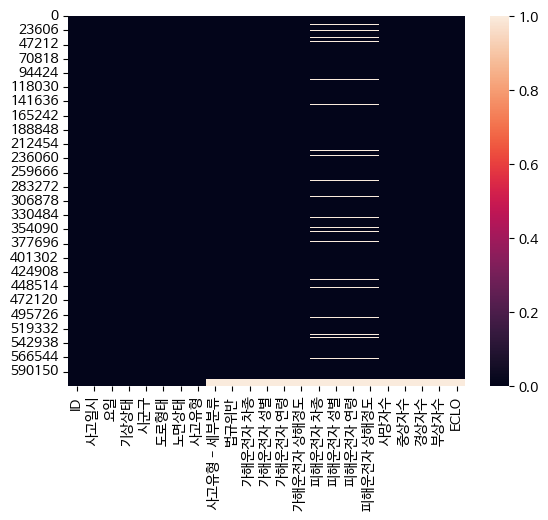

In [9]:
sns.heatmap(train.isna( ))

In [13]:
train['ECLO'].value_counts().sort_index()
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Q1
outliers = (train < (Q1 - 1.0 * IQR)) | (train > (Q3 + 1.0 * IQR))
outliers
train_cleaned = train[~(outliers.any(axis=1))]

<ipython-input-13-59f1cf8920c9>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = train.quantile(0.25)
<ipython-input-13-59f1cf8920c9>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = train.quantile(0.75)


사망자수    0.0
중상자수    1.0
경상자수    1.0
부상자수    0.0
ECLO    3.0
dtype: float64


<ipython-input-13-59f1cf8920c9>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (train < (Q1 - 1.0 * IQR)) | (train > (Q3 + 1.0 * IQR))


In [19]:
train_org = pd.read_csv('/content/drive/MyDrive/open/open/train.csv',encoding = "utf-8", low_memory=False)
test_org = pd.read_csv('/content/drive/MyDrive/open/open/test.csv',encoding = "utf-8", low_memory=False)

In [20]:
train_df = train_org.copy()
test_df = test_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
train_df = train_df.drop(columns=['사고일시'])


test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

In [21]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간', '도시', '구', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시',\n       '구', '동'],\n      dtype='object')"

In [22]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',\n       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

In [23]:
train_df = train_df[['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간',
                     '도시', '구', '동', '도로형태1', '도로형태2']]
train_df

,ID,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,2019,1,1,4,대구광역시,동구,신암동,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,2021,12,31,22,대구광역시,달서구,장동,기타,기타


In [24]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      39609 non-null  object
 1   요일      39609 non-null  object
 2   기상상태    39609 non-null  object
 3   노면상태    39609 non-null  object
 4   사고유형    39609 non-null  object
 5   연       39609 non-null  int64 
 6   월       39609 non-null  int64 
 7   일       39609 non-null  int64 
 8   시간      39609 non-null  int64 
 9   도시      39609 non-null  object
 10  구       39609 non-null  object
 11  동       39609 non-null  object
 12  도로형태1   39609 non-null  object
 13  도로형태2   39609 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   요일      10963 non-null  object
 2   기상상태    10963 non-null  object
 3   노면상태    10963 non-null  object
 4   사고유형    10963 non-null  object
 5   연       10963 non-null  int64 
 6   월       10963 non-null  int64 
 7   일       10963 non-null  int64 
 8   시간      10963 non-null  int64 
 9   도시      10963 non-null  object
 10  구       10963 non-null  object
 11  동       10963 non-null  object
 12  도로형태1   10963 non-null  object
 13  도로형태2   10963 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


None

In [25]:
data = pd.concat([train_df, test_df], sort=False)
df_merge_enc = data.copy()

In [26]:
display(df_merge_enc.head())

,ID,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,2019,1,1,4,대구광역시,동구,신암동,단일로,기타


In [28]:
df_drop_city_days = df_merge_enc.drop(['도시', '구', '동', '일'], axis=1)
display(df_drop_city_days.head())

,ID,요일,기상상태,노면상태,사고유형,연,월,시간,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,2019,1,0,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,2019,1,0,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,2019,1,1,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,2019,1,2,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,2019,1,4,단일로,기타


In [29]:
citydays_columns = df_drop_city_days.columns[1:]
citydays_encoded = pd.get_dummies(df_drop_city_days, columns = citydays_columns)
citydays_encoded = citydays_encoded.iloc[:, 1:].astype(float)
display(citydays_encoded.head())

,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,기상상태_기타,기상상태_눈,기상상태_맑음,...,도로형태2_고가도로위,도로형태2_교량,도로형태2_교차로부근,도로형태2_교차로안,도로형태2_교차로횡단보도내,도로형태2_기타,도로형태2_미분류,도로형태2_주차장,도로형태2_지하차도(도로)내,도로형태2_터널
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
print(citydays_encoded.columns.to_list())

['요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일', '요일_일요일', '요일_토요일', '요일_화요일', '기상상태_기타', '기상상태_눈', '기상상태_맑음', '기상상태_비', '기상상태_안개', '기상상태_흐림', '노면상태_건조', '노면상태_기타', '노면상태_서리/결빙', '노면상태_적설', '노면상태_젖음/습기', '노면상태_침수', '사고유형_차대사람', '사고유형_차대차', '사고유형_차량단독', '연_2019', '연_2020', '연_2021', '연_2022', '월_1', '월_2', '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10', '월_11', '월_12', '시간_0', '시간_1', '시간_2', '시간_3', '시간_4', '시간_5', '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12', '시간_13', '시간_14', '시간_15', '시간_16', '시간_17', '시간_18', '시간_19', '시간_20', '시간_21', '시간_22', '시간_23', '도로형태1_교차로', '도로형태1_기타', '도로형태1_단일로', '도로형태1_미분류', '도로형태1_주차장', '도로형태2_고가도로위', '도로형태2_교량', '도로형태2_교차로부근', '도로형태2_교차로안', '도로형태2_교차로횡단보도내', '도로형태2_기타', '도로형태2_미분류', '도로형태2_주차장', '도로형태2_지하차도(도로)내', '도로형태2_터널']


In [31]:
train_citydays  = citydays_encoded[:len(train_org)]
test_citydays = citydays_encoded[len(train_org):]

In [32]:
train_citydays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39609 entries, 0 to 39608
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   요일_금요일           39609 non-null  float64
 1   요일_목요일           39609 non-null  float64
 2   요일_수요일           39609 non-null  float64
 3   요일_월요일           39609 non-null  float64
 4   요일_일요일           39609 non-null  float64
 5   요일_토요일           39609 non-null  float64
 6   요일_화요일           39609 non-null  float64
 7   기상상태_기타          39609 non-null  float64
 8   기상상태_눈           39609 non-null  float64
 9   기상상태_맑음          39609 non-null  float64
 10  기상상태_비           39609 non-null  float64
 11  기상상태_안개          39609 non-null  float64
 12  기상상태_흐림          39609 non-null  float64
 13  노면상태_건조          39609 non-null  float64
 14  노면상태_기타          39609 non-null  float64
 15  노면상태_서리/결빙       39609 non-null  float64
 16  노면상태_적설          39609 non-null  float64
 17  노면상태_젖음/습기  

In [33]:
test_citydays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10963 entries, 0 to 10962
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   요일_금요일           10963 non-null  float64
 1   요일_목요일           10963 non-null  float64
 2   요일_수요일           10963 non-null  float64
 3   요일_월요일           10963 non-null  float64
 4   요일_일요일           10963 non-null  float64
 5   요일_토요일           10963 non-null  float64
 6   요일_화요일           10963 non-null  float64
 7   기상상태_기타          10963 non-null  float64
 8   기상상태_눈           10963 non-null  float64
 9   기상상태_맑음          10963 non-null  float64
 10  기상상태_비           10963 non-null  float64
 11  기상상태_안개          10963 non-null  float64
 12  기상상태_흐림          10963 non-null  float64
 13  노면상태_건조          10963 non-null  float64
 14  노면상태_기타          10963 non-null  float64
 15  노면상태_서리/결빙       10963 non-null  float64
 16  노면상태_적설          10963 non-null  float64
 17  노면상태_젖음/습기  

In [34]:
skw_train = train_org.copy()
skw_train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57세,경상,0,0,1,0,3


In [35]:
from scipy.stats import skew

eclo_skewness = skew(skw_train['ECLO'])

print(f"Skewness of ECLO column: {eclo_skewness}")

Skewness of ECLO column: 3.3519660066074617


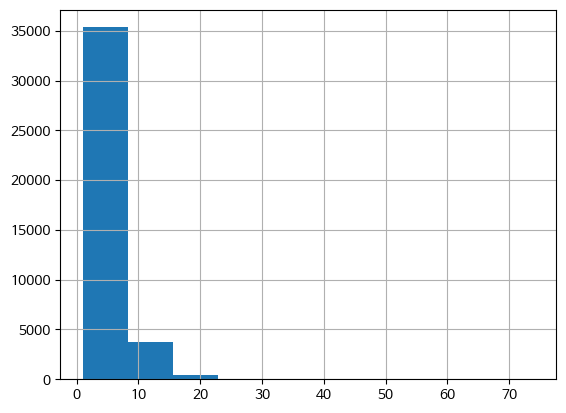

In [36]:
skw_train['ECLO'].hist()
plt.show()

In [37]:
skw_train['ECLO_log'] = np.log2(skw_train['ECLO'])
transform_eclo = np.log2(skw_train['ECLO'])
transform_eclo
eclo_log_skewness = skw_train['ECLO_log'].skew()
print(f"Skewness of transformed ECLO column: {eclo_log_skewness}")

Skewness of transformed ECLO column: -0.05947172323251755


In [41]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
target_column = "ECLO_log"
eclo_y_train = skw_train[target_column]
cd_features = train_citydays
X_train, X_val, y_train, y_val = train_test_split(cd_features, eclo_y_train, test_size=0.2)

In [42]:
print("Size of X_train is:{}\nSize of y_train is:{}\nSize of X_valid is:{}\nSize of y_valid is:{}\n".format(
    X_train.shape,y_train.shape,X_val.shape,y_val.shape))

Size of X_train is:(31687, 77)
Size of y_train is:(31687,)
Size of X_valid is:(7922, 77)
Size of y_valid is:(7922,)

